# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member** - Rina Patel

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**###TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

**###objective: to build a predictive ML model, which could help in predicting the views of the videos uploaded on the TEDx website.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [74]:
# Import Libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud
from sklearn.feature_selection import f_regression
import scipy.stats as stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [75]:
# Load Dataset
tedtalk_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TED talk views prediction project 2/data_ted_talks.csv')

### Dataset First View

In [76]:
# Dataset First Look
tedtalk_data.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

### Dataset Rows & Columns count

In [77]:
# Dataset Rows & Columns count
tedtalk_data.shape

(4005, 19)

### Dataset Information

In [78]:
# Dataset Info
tedtalk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [79]:
# Dataset Duplicate Value Count
tedtalk_data.duplicated().sum()

0

#### Missing Values/Null Values

In [80]:
# Missing Values/Null Values Count
tedtalk_data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

<Axes: >

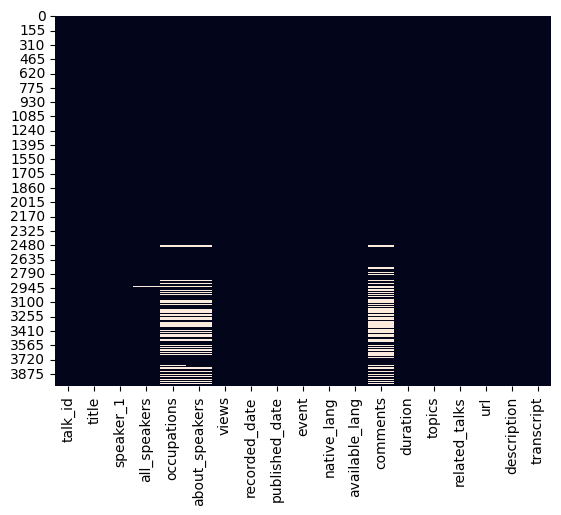

In [81]:
# Visualizing the missing values
sns.heatmap(tedtalk_data.isna(), cbar=False)

### What did you know about your dataset?

Answer Here
The TED Talk dataset contains 4005 rows and 19 columns.No duplicate values have been identified in the dataset. Around 42% of the data is missing in three columns: "occupations" , "about_speakers" and "comments ".there are also some missing values in the "all_speakers" and "recorded_date" columns.

## ***2. Understanding Your Variables***

In [82]:
# Dataset Columns
tedtalk_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [83]:
# Dataset Describe
tedtalk_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

Answer Here
The dataset comprises 19 variables, with 3 being numeric,1 being float and 15 being of object type.

### Check Unique Values for each variable.

In [84]:
# Check Unique Values for each variable.
for i in tedtalk_data.columns.tolist():
    print("No. of unique values in ",i,"is",tedtalk_data[i].unique(),".")
    print('')

No. of unique values in  talk_id is [    1    92     7 ... 62263 62784 62794] .

No. of unique values in  title is ['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean'] .

No. of unique values in  speaker_1 is ['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright'] .

No. of unique values in  all_speakers is ["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"] .

No. of unique values in  occupations is ["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"] .

No. of u

In [85]:
for i in tedtalk_data.columns.tolist():
  print("No. of unique values in ",i,"is",tedtalk_data[i].nunique(),".")

No. of unique values in  talk_id is 4005 .
No. of unique values in  title is 4005 .
No. of unique values in  speaker_1 is 3274 .
No. of unique values in  all_speakers is 3306 .
No. of unique values in  occupations is 2049 .
No. of unique values in  about_speakers is 2977 .
No. of unique values in  views is 3996 .
No. of unique values in  recorded_date is 1334 .
No. of unique values in  published_date is 2962 .
No. of unique values in  event is 459 .
No. of unique values in  native_lang is 12 .
No. of unique values in  available_lang is 3902 .
No. of unique values in  comments is 601 .
No. of unique values in  duration is 1188 .
No. of unique values in  topics is 3977 .
No. of unique values in  related_talks is 4005 .
No. of unique values in  url is 4005 .
No. of unique values in  description is 4005 .
No. of unique values in  transcript is 4005 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [86]:
tedtalk_data['views'].describe()

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64

In [87]:
a = tedtalk_data[tedtalk_data['views']==0]

In [88]:
a.shape

(6, 19)

In [89]:
tedtalk_data[tedtalk_data['views']==0][['published_date','recorded_date'] ]

,published_date,recorded_date
2813,2018-06-06,2018-04-26
3056,2018-11-29,2018-11-05
3068,2018-12-07,2018-11-05
3520,2019-06-11,2019-05-18
3790,2019-12-19,2019-10-24
4004,2020-04-30,2020-04-30


In [90]:
tedtalk_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [91]:
#speaker of top 10 view video
top_10_views_data = tedtalk_data.nlargest(10, ['views'])
top_10_views_data[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


In [92]:
#top 10 popular speaker
top_10_popular_data=tedtalk_data.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular_data.reset_index(inplace=True)
top_10_popular_data

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


In [93]:
#top 10 most frequent event
top_10_freq_event=tedtalk_data[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
top_10_freq_event.reset_index(inplace=True)
top_10_freq_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


In [94]:
#top 10 popular event
top_10_popular=tedtalk_data[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular.reset_index(inplace=True)
top_10_popular

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


In [95]:
#convert published_date column to date time format
tedtalk_data['published_date'] = tedtalk_data['published_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [97]:
#create day, month and year from the published_date column
tedtalk_data['published_day'] = tedtalk_data['published_date'].apply(lambda x: x.weekday())
tedtalk_data['published_month']=tedtalk_data['published_date'].apply(lambda x: x.month)
tedtalk_data['published_year'] = tedtalk_data['published_date'].apply(lambda x: x.year)

In [98]:
# map published_day column with respective week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_data['published_day']=tedtalk_data['published_day'].map(week_day)

In [99]:
# which day of the month having maximum published
publish_day_freq=tedtalk_data[['published_day','views']].groupby('published_day').agg({'views' : 'count'})
publish_day_freq=publish_day_freq.sort_values('views',ascending=False)
publish_day_freq.reset_index(inplace=True)
publish_day_freq

,published_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


In [100]:
# best published day of the week by average views count
best_day=tedtalk_data[['published_day','views']].groupby('published_day').agg({'views' : 'mean'})
best_day=best_day.sort_values('views',ascending=False)
best_day.reset_index(inplace=True)

In [101]:
# published_month change to respective month name
month_name={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_data['published_month']=tedtalk_data['published_month'].map(month_name)

In [102]:
# which month maximum published talks
published_month_freq=tedtalk_data[['published_month','views']].groupby('published_month').agg({'views' : 'count'})
published_month_freq=published_month_freq.sort_values('views',ascending=False)
published_month_freq.reset_index(inplace=True)

In [103]:
# best published months by average views count
published_month_best=tedtalk_data[['published_month','views']].groupby('published_month').agg({'views' : 'mean'})
published_month_best=published_month_best.sort_values('views',ascending=False)
published_month_best.reset_index(inplace=True)

In [104]:
# which years have maximum published
published_year_freq=tedtalk_data[['published_year','views']].groupby('published_year').agg({'views' : 'count'})
published_year_freq=published_year_freq.sort_values('views',ascending=False)
published_year_freq.reset_index(inplace=True)

In [105]:
# best published year by average views count
published_year_best=tedtalk_data[['published_year','views']].groupby('published_year').agg({'views' : 'mean'})
published_year_best=published_year_best.sort_values('views',ascending=False)
published_year_best.reset_index(inplace=True)

### What all manipulations have you done and insights you found?

We describe the view column after that speaker of top 10 view video,top 10 popular speaker,top 10 most frequent event,top 10 popular event,convert published_date column to date time format.create day, month and year from the published_date column,map published_day column with respective week day name,which day of the month having maximum published,best published day of the week by average views count,published_month change to respective month name,which month maximum published talks,best published months by average views count,which years have maximum published,best published year by average views count.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

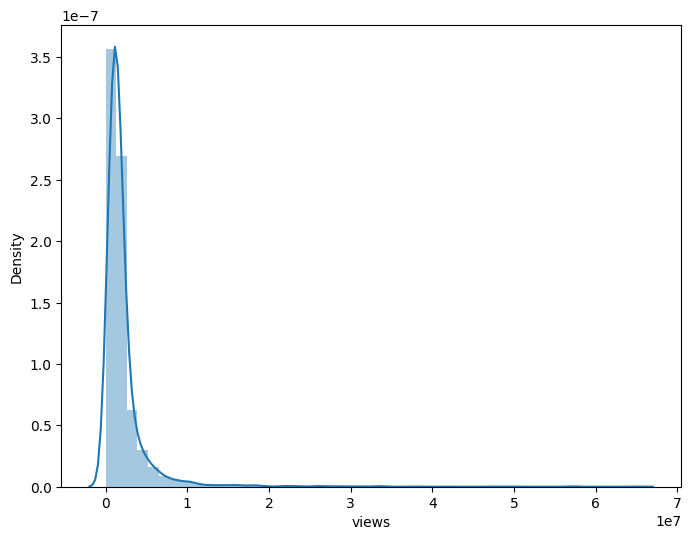

In [106]:
# Chart - 1 visualization code
#plot views
plt.figure(figsize=(8,6))
sns.distplot(tedtalk_data['views'],kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
This is our target as well as numerical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
views feature are right skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Data insights can positively impact a business through growth opportunities, cost optimization, and customer satisfaction, but misinterpretation and neglect can lead to negative outcomes.

#### Chart - 2

There are 157160 words in the combination of all titles in dataset.



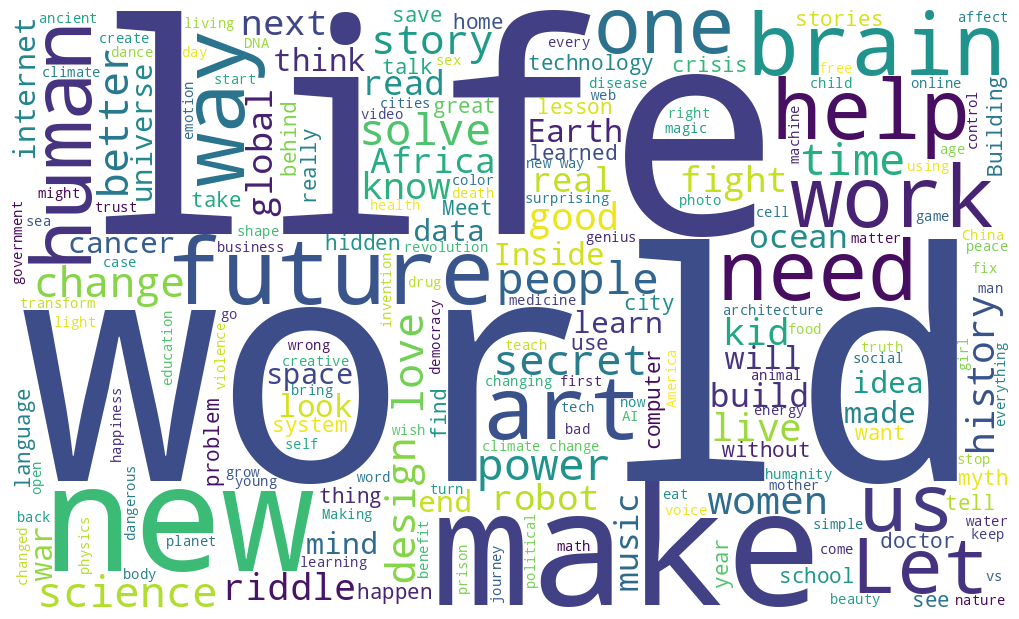

In [107]:
# Chart - 2 visualization code
#word cloud from title
words = ' '.join(text for text in tedtalk_data.title.astype(str))
print(f'There are {len(words)} words in the combination of all titles in dataset.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
a visual representation of the most frequently occurring words in that title.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Majority of titles contains words: life, world, make, new, future, art, brain,work, human, science.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
This word cloud highlights the key terms and concepts from the title.

#### Chart - 3

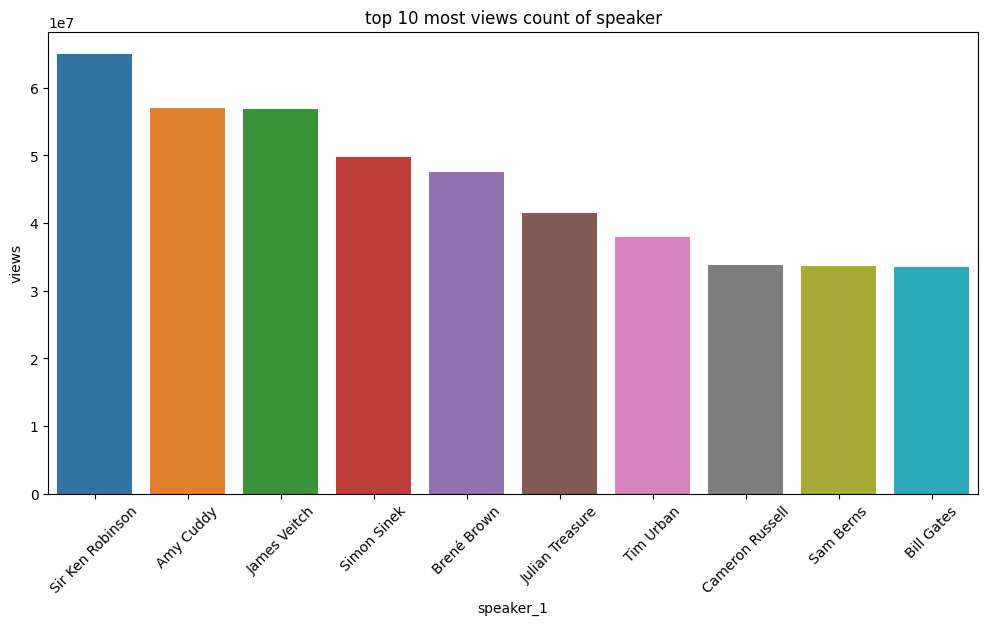

In [108]:
# Chart - 3 visualization code
#speaker of top 10 view video
plt.figure(figsize=(12,6))
plt.title("top 10 most views count of speaker")
sns.barplot(x='speaker_1',y='views',data = top_10_views_data)
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to.  
chart to clearly show the ranking of the top 10 most viewed videos.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Sir Ken Robinson,s talk have the highest view count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 4

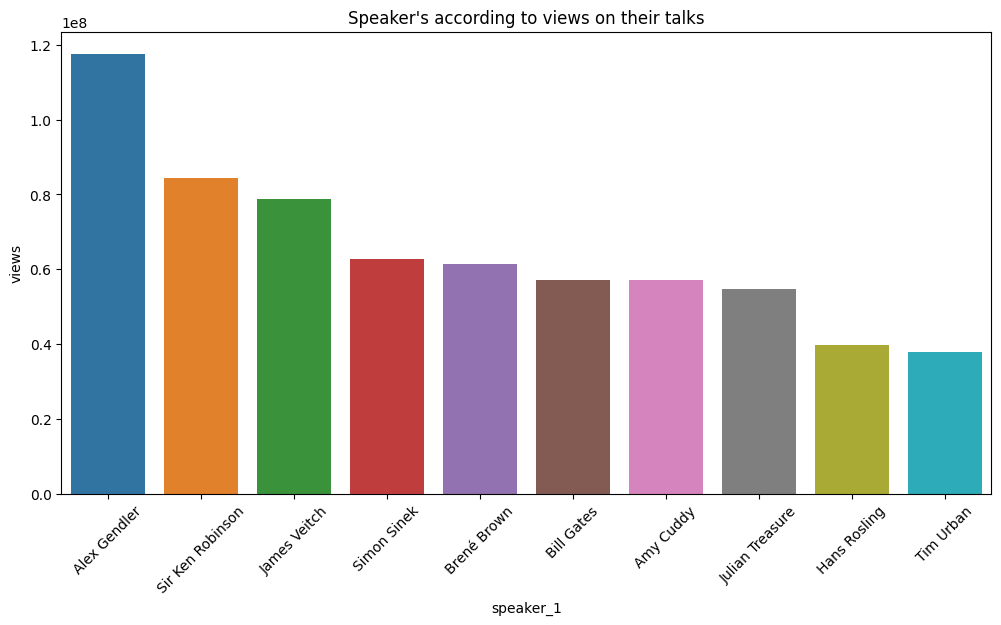

In [109]:
# Chart - 4 visualization code
#visualize top 10 popular speaker
plt.figure(figsize=(12,6))
plt.title("Speaker's according to views on their talks")
sns.barplot(x='speaker_1',y='views',data=top_10_popular_data)
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.chat consider factors like the ease of readability, the nature of data, and the audience are presenting to.
chart to clearly show the ranking of the top 10 popular speaker

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Alex Gendler is the most popular speaker

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 5

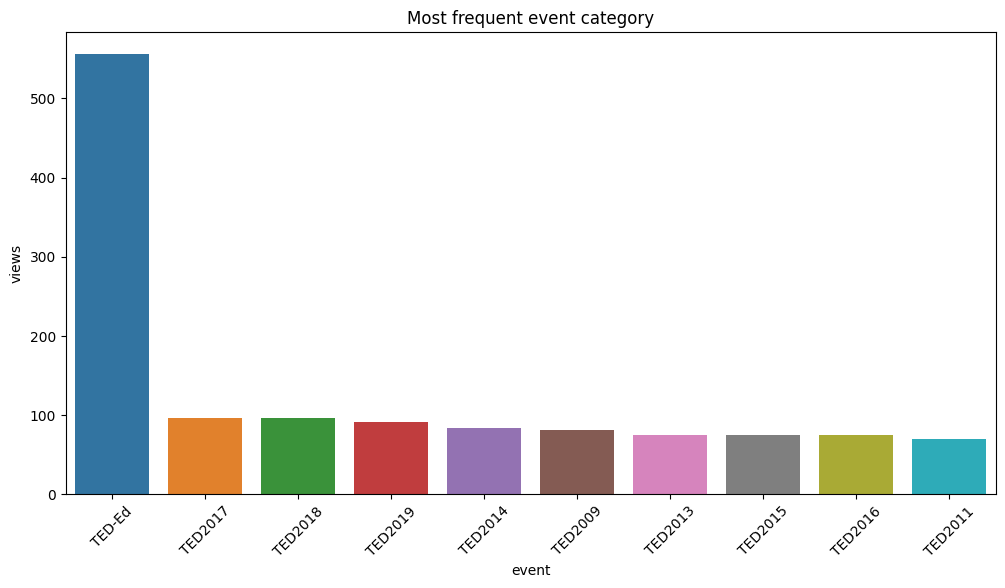

In [110]:
# Chart - 5 visualization code
#visualize top 10 most frequent event
plt.figure(figsize=(12,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=top_10_freq_event)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show the ranking of the top 10 most frequent event.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
TED-Ed is the most frequent event

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 6

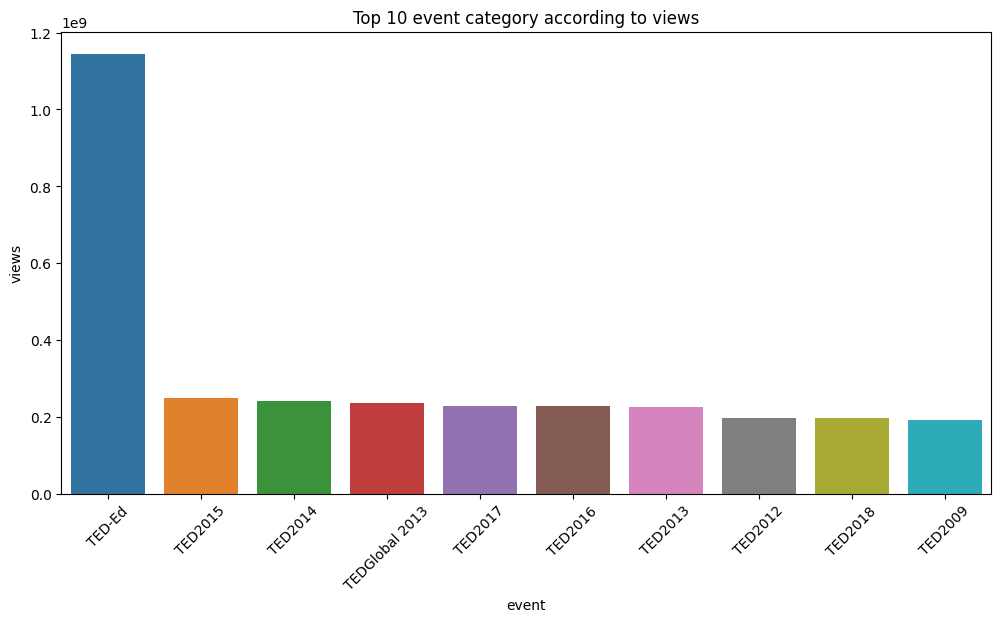

In [111]:
# Chart - 6 visualization code
#top 10 popular event
plt.figure(figsize=(12,6))
plt.title('Top 10 event category according to views')
sns.barplot(x='event',y='views',data=top_10_popular)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show the ranking of the top 10 popular event.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most popular event is TED-Ed having highest number of total views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 7

There are 404126 words in the combination of all topics.



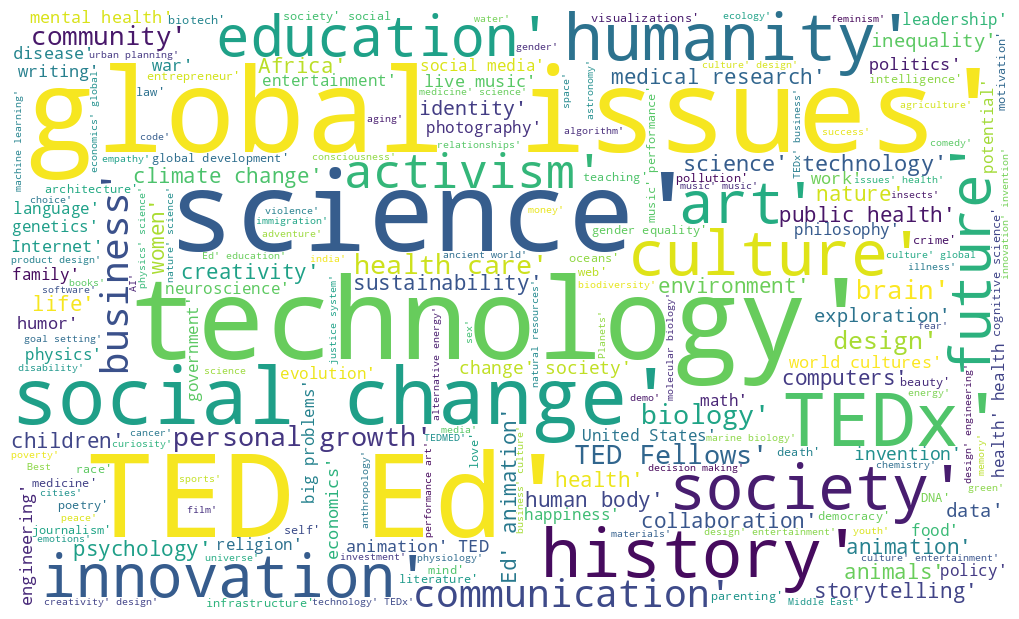

In [112]:
# Chart - 7 visualization code
#word cloud from topics
words =' '.join(text for text in tedtalk_data.topics.astype(str))
print (f'There are {len(words)} words in the combination of all topics.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
a visual representation of the most frequently occurring words in that topics


##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most popular topic tags are TED Ed, technology, global issues, science, TEDx, Social change, humanity, society, activism,education, communication.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
This word cloud highlights the key terms and concepts from the topics

#### Chart - 8

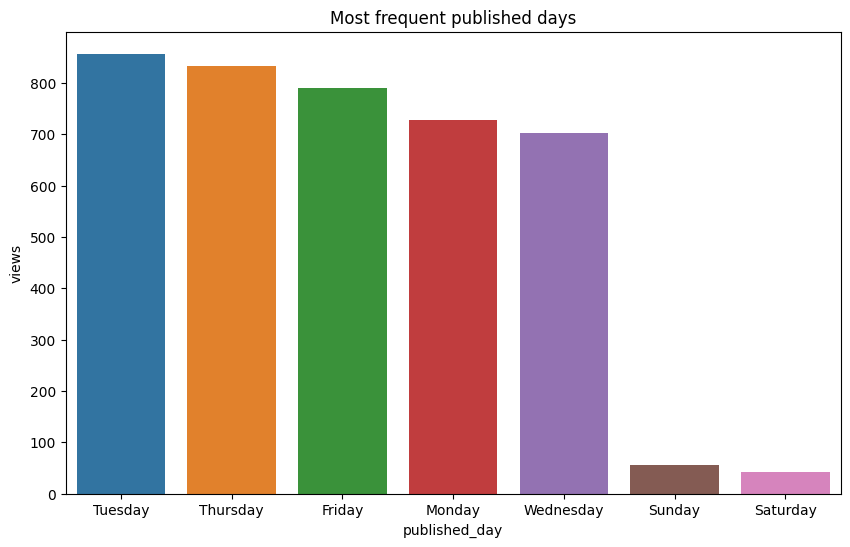

In [113]:
# Chart - 8 visualization code
# visualise which day of the month having maximum published
plt.figure(figsize=(10,6))
sns.barplot(x='published_day',y='views',data=publish_day_freq)
plt.title('Most frequent published days')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show the ranking of the month having maximum published

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most Talks are published on 5 days in week Tuesday,Thursday,Friday,Monday,Wednesday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 9

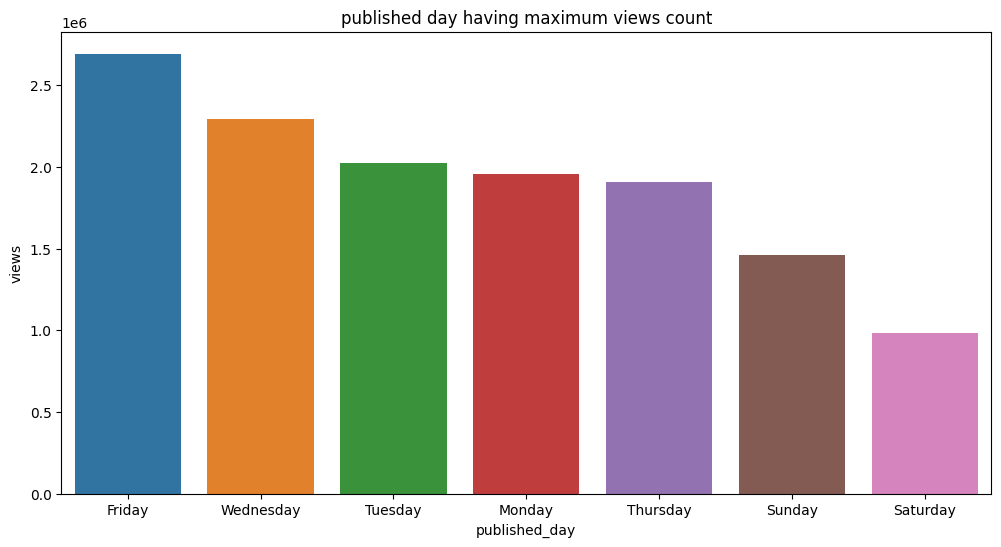

In [114]:
# Chart - 9 visualization code
# visualise best published day of the week by average views count
plt.figure(figsize=(12,6))
plt.title('published day having maximum views count')
sns.barplot(x='published_day',y='views',data=best_day)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show best published day of the week by average views count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Friday published talks have more average views count

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 10

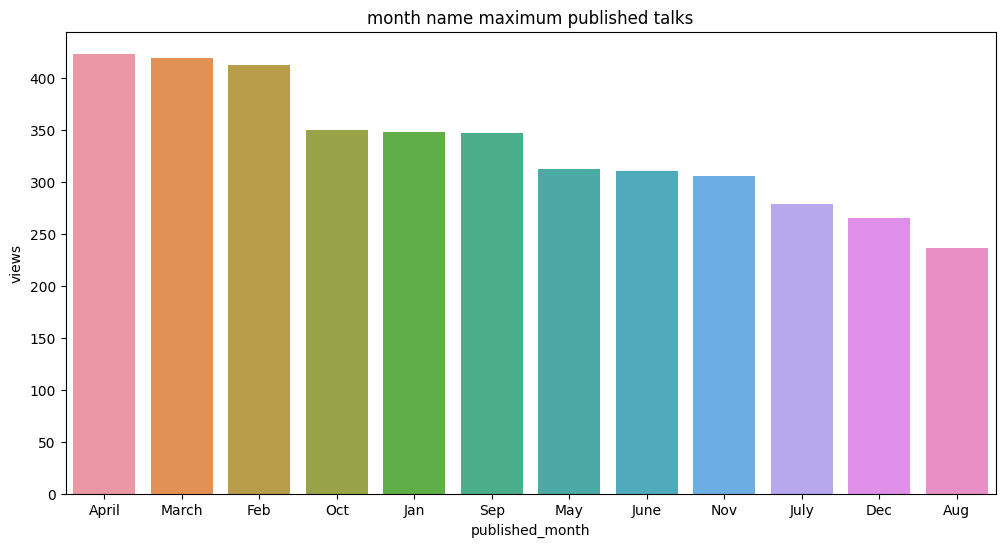

In [115]:
# Chart - 10 visualization code
# visualise which month maximum published talks
plt.figure(figsize=(12,6))
sns.barplot(x='published_month',y='views',data=published_month_freq)
plt.title('month name maximum published talks')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show which month maximum published talks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
April, March, and Feb months have highest frequency of published talks

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 11

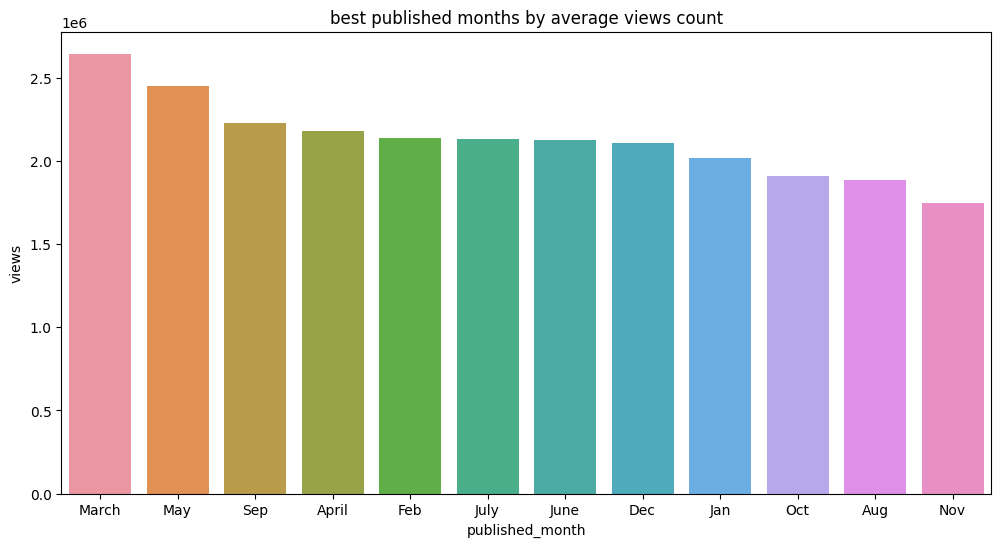

In [116]:
# Chart - 11 visualization code
# visualise best published months by average views count
plt.figure(figsize=(12,6))
plt.title('best published months by average views count')
sns.barplot(x='published_month',y='views',data=published_month_best)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show best published months by average views count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
March month have more average views count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 12

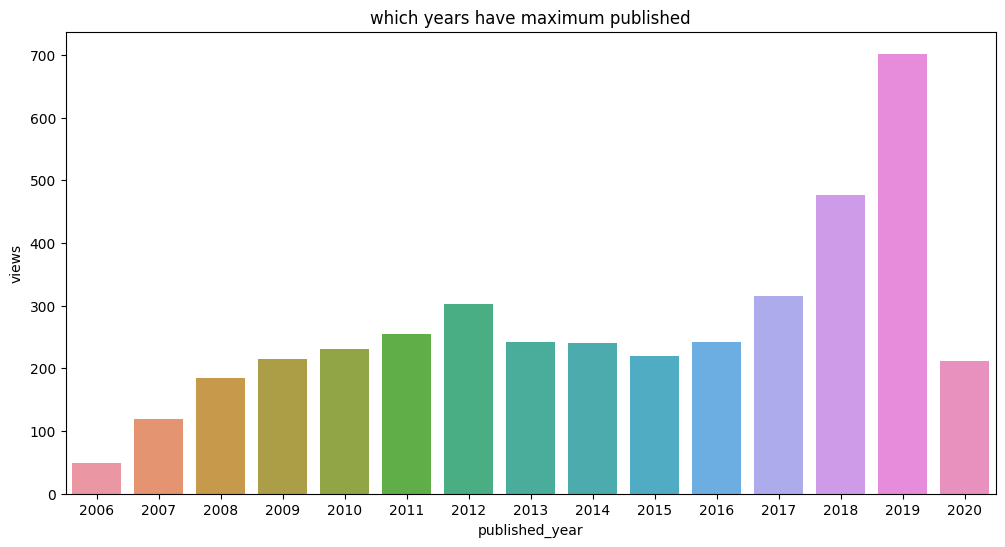

In [117]:
# Chart - 12 visualization code
# visualise which years have maximum published
plt.figure(figsize=(12,6))
sns.barplot(x='published_year',y='views',data=published_year_freq)
plt.title('which years have maximum published')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show which years have maximum published

##### 2. What is/are the insight(s) found from the chart?

Answer Here
In 2019 have Published maximum talks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 13

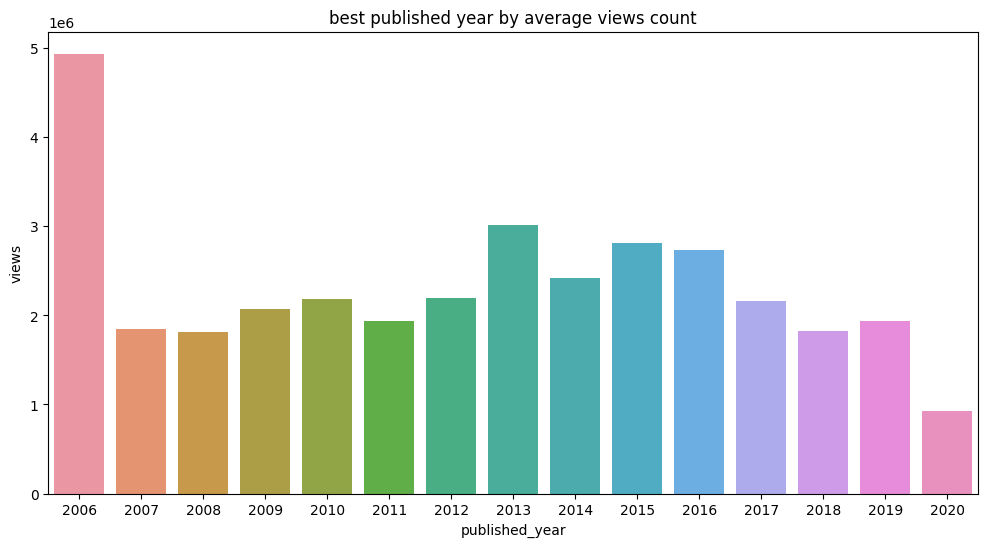

In [118]:
# Chart - 13 visualization code
# visualise best published year by average views count
plt.figure(figsize=(12,6))
plt.title('best published year by average views count')
sns.barplot(x='published_year',y='views',data=published_year_best)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
chat consider factors like the ease of readability, the nature of data, and the audience are presenting to. chart to clearly show best published year by average views count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
in 2016 have highest number of average view count

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive impacts may be indicated by upward trends, while negative growth can be visualized by downward trends

#### Chart - 14 - Correlation Heatmap

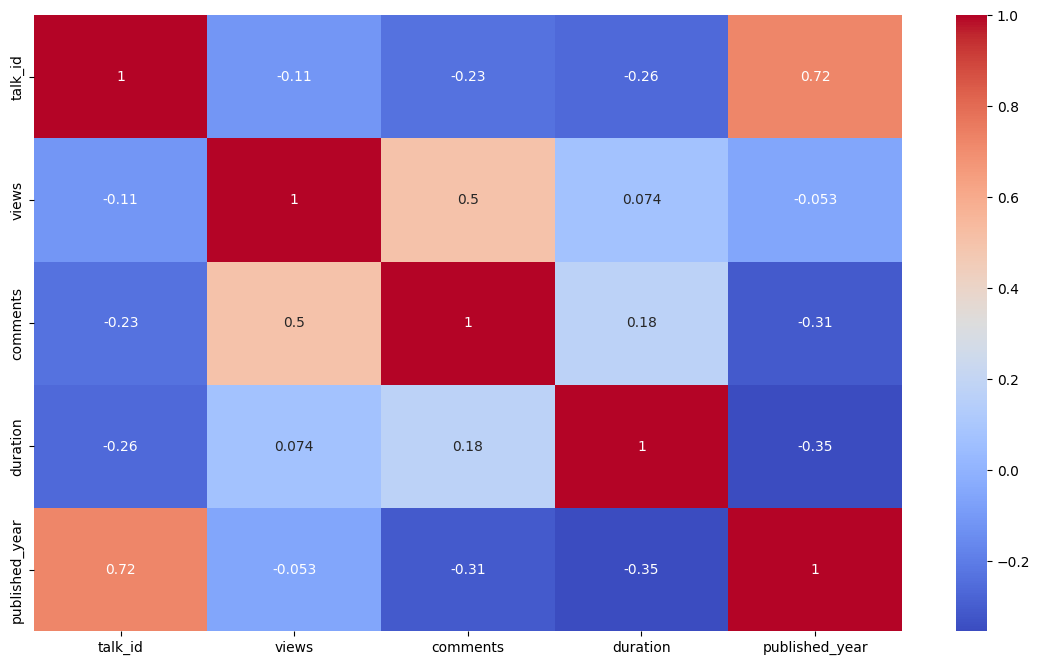

In [119]:
# Correlation Heatmap visualization code
#corelation plot
plt.figure(figsize=(14,8))
sns.heatmap(tedtalk_data.corr(),annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
valuable tool for exploring and understanding the relationships between variables in a dataset, which is essential for making data-driven decisions and building accurate predictive models

##### 2. What is/are the insight(s) found from the chart?

Answer Here
A correlation heatmap provides insights into relationships between variables. It reveals the strength and direction of correlations, identifies multicollinearity, aids in feature selection for models, and highlights clusters or anomalies. However, it doesn't imply causation, so further analysis is necessary to draw meaningful conclusions from the observed correlations.

#### Chart - 15 - Pair Plot

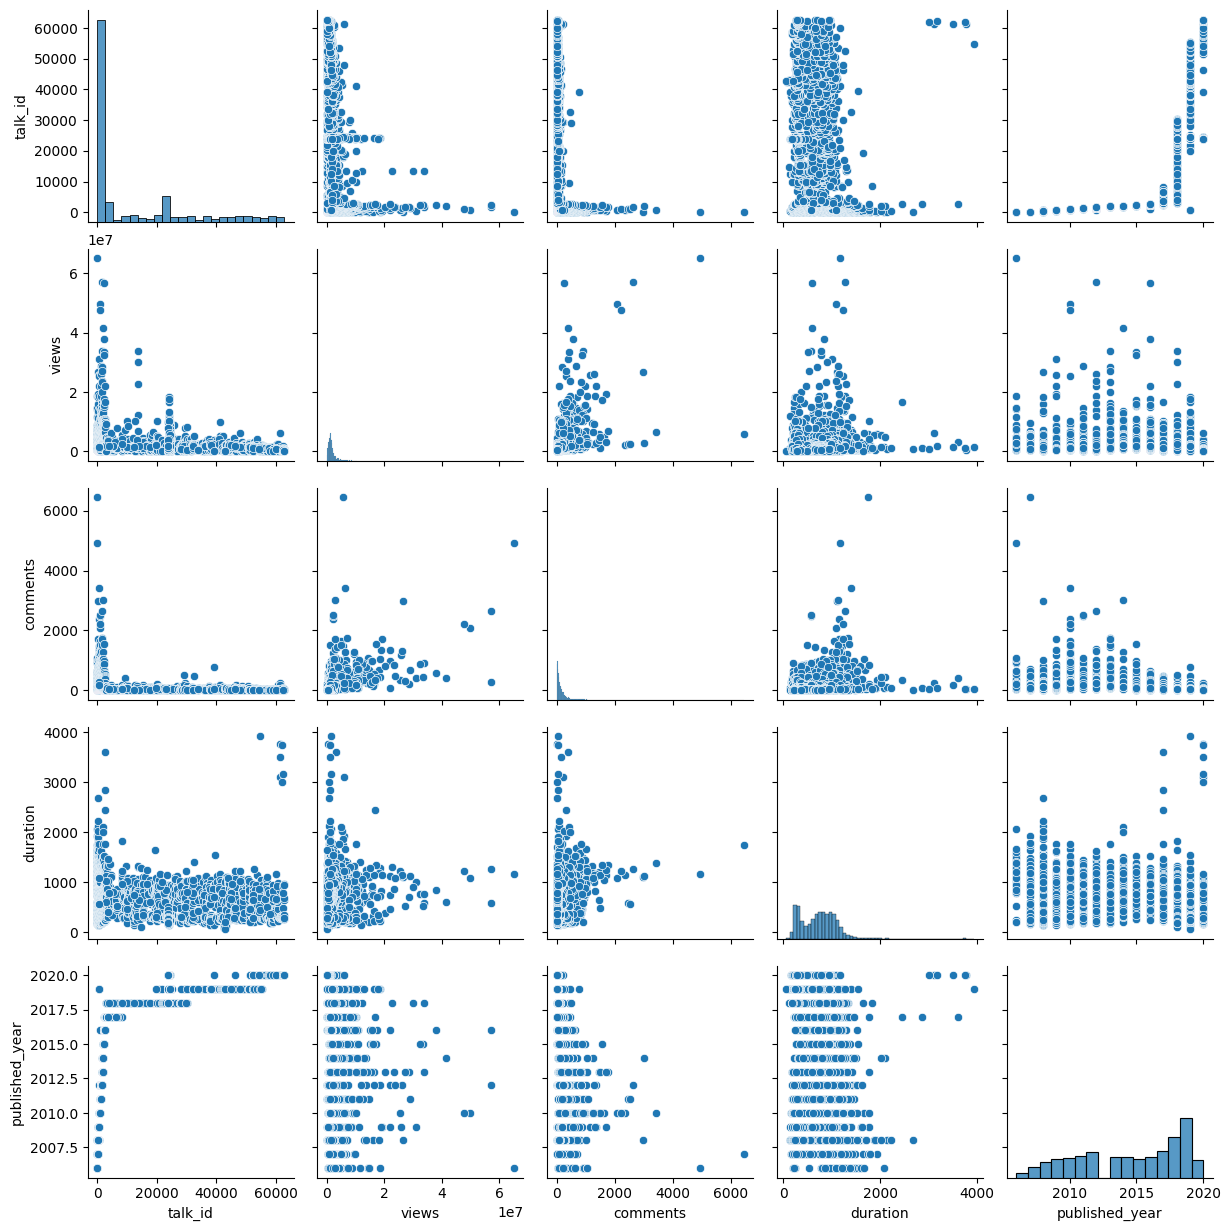

In [120]:
# Pair Plot visualization code
sns.pairplot(tedtalk_data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
I selected the pair plot because it's a powerful visualization tool for data exploration. It displays pairwise relationships between variables, making it useful for identifying patterns, trends, and potential correlations in multidimensional datasets, helping with feature selection and initial data understanding.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
A pair plot offers insights by visualizing variable relationships, distribution patterns, multivariate interactions, and feature importance. It can reveal clusters or groups within data, aiding in data exploration and identification of significant patterns and outliers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on our chart we define three hypothetical statements
*The relationship between "views" and "comments" in a dataset.
*The "views" and "duration" columns.
The "views" and "available_lang" columns in the TED talk datasetAnswer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.The relationship between "views" and "comments" in a dataset, the null hypothesis (H0) and alternate hypothesis (H1) can be defined as follows:

Null Hypothesis (H0): There is no statistically significant linear relationship between the number of views and the number of comments for the data. In other words, the correlation between "views" and "comments" is zero or very close to zero.

Alternate Hypothesis (H1): There is a statistically significant linear relationship between the number of views and the number of comments for the data. In other words, the correlation between "views" and "comments" is not zero or significantly different from zero.

#### 2. Perform an appropriate statistical test.

In [123]:
 # Perform Statistical Test to obtain P-Value
views = tedtalk_data['views']
comments = tedtalk_data['comments'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(views, comments)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between views and comments.')


Correlation coefficient: 0.46
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I recommended using the Pearson correlation test to obtain a p-value for the relationship between "views" and "comments."

##### Why did you choose the specific statistical test?

The Pearson correlation test assesses the strength and direction of the linear relationship between two continuous variables and provides a p-value to determine if the relationship is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The "views" and "duration" columns. The null hypothesis (H0) and the alternate hypothesis (H1) can be stated as follows:

Null Hypothesis (H0):
There is no significant relationship between the duration of a TED talk and the number of views it receives. In other words, the duration of a talk does not affect the number of views it gets.

Alternate Hypothesis (H1):
There is a significant relationship between the duration of a TED talk and the number of views it receives. In other words, the duration of a talk does affect the number of views it gets.

#### 2. Perform an appropriate statistical test.

In [124]:
# Perform Statistical Test to obtain P-Value
views = tedtalk_data['views']
duration = tedtalk_data['duration']

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(views, duration)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between views and duration.')

Correlation coefficient: 0.07
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
the test used to obtain the p-value is a t-test within a linear regression analysis.

##### Why did you choose the specific statistical test?

Answer Here.
the choice of statistical test may also depend on the specific goals of the analysis and the characteristics of the dataset.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
The "views" and "available_lang" columns in the TED talk dataset,
Null Hypothesis (H0):
There is no significant relationship between the languages available for a TED talk and the number of views it receives. In other words, the languages in which a talk is available do not affect the number of views.

Alternate Hypothesis (H1):
There is a significant relationship between the languages available for a TED talk and the number of views it receives. In other words, the languages in which a talk is available do affect the number of views.

#### 2. Perform an appropriate statistical test.

In [125]:
tedtalk_data['no_of_available_lang'] = tedtalk_data.apply(lambda row: len(row['available_lang']), axis=1)

In [126]:
# Perform Statistical Test to obtain P-Value
views = tedtalk_data['views']
available_lang = tedtalk_data['no_of_available_lang']

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(views, available_lang)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between views and duration.')

Correlation coefficient: 0.35
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


The output of the test will include a p-value. This p-value represents the probability that the relationship between available languages and views is due to random chance. A low p-value (typically less than 0.05) would suggest that there is a significant relationship.

##### Which statistical test have you done to obtain P-Value?

Answer Here.
Analysis of Variance (ANOVA): ANOVA is used when you have multiple groups (in this case, different languages) and you want to test whether there are statistically significant differences in the means of a continuous dependent variable (in this case, "views") among these groups. ANOVA assumes that the data is normally distributed and that variances are approximately equal among the groups.

If the p-value from ANOVA is less than your chosen significance level (e.g., 0.05), it suggests that there are significant differences in views among the language groups.
Kruskal-Wallis Test: Kruskal-Wallis is a non-parametric alternative to ANOVA and is used when the assumptions of ANOVA are not met, such as when the data is not normally distributed or variances are unequal. It tests whether there are significant differences in the medians of the dependent variable among multiple groups.

If the p-value from the Kruskal-Wallis test is less than your chosen significance level, it suggests that there are significant differences in views among the language groups.

##### Why did you choose the specific statistical test?

Answer Here.Answer Here.
The choice between ANOVA and Kruskal-Wallis is not arbitrary but is based on the characteristics of your data and the statistical assumptions that need to be met.

## ***6. Feature Engineering & Data Pre-processing***

* ### **Speaker_1**

In [127]:
# create new feature speaker_1_avg_views
speaker_avg_views=tedtalk_data.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_avg_views = speaker_avg_views.to_dict()
speaker_avg_views = speaker_avg_views.values()
speaker_avg_views =  list(speaker_avg_views)[0]
tedtalk_data['speaker_1_avg_views'] = tedtalk_data['speaker_1'].map(speaker_avg_views)

In [128]:
#now drop speaker_1 feature
tedtalk_data = tedtalk_data.drop('speaker_1', axis=1)

* ### **event**

In [129]:
# How many unique event name present in dataset
tedtalk_data['event'].nunique()

459

* event feature have lots of similar event name

In [130]:
print(list(tedtalk_data['event'].unique()))

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [131]:
#create new feature event_wise_avg_views
event_wise = tedtalk_data.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
event_wise = event_wise.to_dict()
event_wise = event_wise.values()
event_wise =  list(event_wise)[0]
tedtalk_data['event_wise_avg_views'] = tedtalk_data['event'].map(event_wise)

In [132]:
#now drop event feature
tedtalk_data = tedtalk_data.drop('event', axis=1)

* ### **available_lang**

In [133]:
#create new feature num_of_lang
tedtalk_data['available_lang'] = tedtalk_data.apply(lambda x: eval(x['available_lang']), axis=1)
tedtalk_data['num_of_lang'] = tedtalk_data.apply(lambda x: len(x['available_lang']), axis=1)

In [134]:
#now drop available_lang feature
tedtalk_data = tedtalk_data.drop('available_lang', axis=1)

* ### **topics**

In [135]:
tedtalk_data.columns

Index(['talk_id', 'title', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'native_lang', 'comments',
       'duration', 'topics', 'related_talks', 'url', 'description',
       'transcript', 'published_day', 'published_month', 'published_year',
       'no_of_available_lang', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_lang'],
      dtype='object')

In [136]:
#create new feature num_of_tag
tedtalk_data['topics'] = tedtalk_data.apply(lambda x: eval(x['topics']), axis=1)
tedtalk_data['num_of_tag'] = tedtalk_data.apply(lambda x: len(x['topics']), axis=1)

In [137]:
#find unique topics name from topics feature
unique_topics=[]
for i in range(0,len(tedtalk_data)):
  temp = tedtalk_data['topics'][i]
  for words in temp:
    if(words not in unique_topics):
      unique_topics.append(words)

In [138]:
#storing avg views with respect to each topic in dict unique_topics_avg_views_dict
unique_topics_avg_views_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(tedtalk_data)):
    temp2=tedtalk_data['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_data['views'][i]
      count+=1
  unique_topics_avg_views_dict[topic]=temp//count

#create new feature topics_wise_avg_views

topics_wise_avg_views=[]
for i in range(0,len(tedtalk_data)):
  temp=0
  temp_topic=tedtalk_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_views_dict[ele]

  topics_wise_avg_views.append(temp//len(temp_topic))

temp_df = pd.Series(topics_wise_avg_views)
tedtalk_data['topics_wise_avg_views'] = temp_df.values

In [139]:
#now drop topics feature
tedtalk_data = tedtalk_data.drop('topics', axis=1)

* ### **published_date**

In [140]:
#create new feature video_age
tedtalk_data['video_age'] = 2021 - tedtalk_data['published_year']

In [141]:
#now drop published_date feature
tedtalk_data = tedtalk_data.drop('published_date', axis=1)

* ### **related_talks**

In [142]:
# create new feature related_views
tedtalk_data['related_talks'] = tedtalk_data.apply(lambda row: eval(row['related_talks']),axis=1)

tedtalk_data['related_views'] = 0

for index, row in tedtalk_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(tedtalk_data)):
      if (tedtalk_data.loc[i,'talk_id']) in id_list:
        temp+=tedtalk_data.loc[i,'views']

    tedtalk_data.loc[index,'related_views']=temp//6

In [143]:
#now drop related_talks feature
tedtalk_data = tedtalk_data.drop('related_talks', axis=1)